## This is the Notebook to compare fmg & gather & mapping results

- gather_ref_f_weighted → standard gather result (k31, used to select genomes)
- ref_f_weighted → FMG (fastmulti-gather) result (k21)
- f_mapped_reads → genome-grist read mapping result

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1) read files
gather = pd.read_csv("../gather/gather_ref_f_weighted.tsv", sep="\t")
mapdf  = pd.read_csv("../f_mapped_reads/fmg_f_mapped_reads.csv")

# 2) merge on accession
merged = mapdf.merge(gather, on="accession", how="left")

# 3) keep only requested columns (in your preferred order)
keep = [
    "accession",
    "gather_ref_f_weighted",
    "ref_f_weighted",
    "f_mapped_reads",
    "biome1","biome2","biome3",
    "total_mapped_reads",
    "total_n_reads",
    "n_matches",
]
merged = merged[keep]

# 4) display + save
merged.head()

,accession,gather_ref_f_weighted,ref_f_weighted,f_mapped_reads,biome1,biome2,biome3,total_mapped_reads,total_n_reads,n_matches
0,DRR014782,0.868853,0.949541,0.905193,Host-associated,Mammals,Respiratory system,75612507,83531900,12389
1,DRR014785,0.863483,0.946977,0.904628,Host-associated,Mammals,Respiratory system,83163638,91931356,13328
2,DRR121397,0.153467,0.648576,0.371231,Host-associated,Plants,Root,2121643,5715162,17436
3,DRR121401,0.107862,0.601657,0.288395,Host-associated,Plants,Root,1311236,4546672,16482
4,ERR10695318,0.748644,0.877064,0.859269,Engineered,Food production,Dairy products,123175020,143348680,13000


In [3]:
merged.to_csv("gather_fmg_grist.csv",index=False)

In [4]:
df = pd.read_csv("gather_fmg_grist.csv")
df

,accession,gather_ref_f_weighted,ref_f_weighted,f_mapped_reads,biome1,biome2,biome3,total_mapped_reads,total_n_reads,n_matches
0,DRR014782,0.868853,0.949541,0.905193,Host-associated,Mammals,Respiratory system,75612507,83531900,12389
1,DRR014785,0.863483,0.946977,0.904628,Host-associated,Mammals,Respiratory system,83163638,91931356,13328
2,DRR121397,0.153467,0.648576,0.371231,Host-associated,Plants,Root,2121643,5715162,17436
3,DRR121401,0.107862,0.601657,0.288395,Host-associated,Plants,Root,1311236,4546672,16482
4,ERR10695318,0.748644,0.877064,0.859269,Engineered,Food production,Dairy products,123175020,143348680,13000
...,...,...,...,...,...,...,...,...,...,...
78,SRR7299214,0.289706,0.566850,0.403080,Engineered,Solid waste,Landfill,6705137,16634768,26105
79,SRR7610133,0.289630,0.526295,0.510271,Host-associated,Fish,Digestive system,3058996,5994846,14140
80,SRR9109404,0.612335,0.756233,0.646912,Host-associated,Fish,Digestive system,25075735,38762198,20680
81,SRR9182859,NaN,0.644513,0.644015,Host-associated,Invertebrates,Cnidaria,104629074,162463680,52569


In [8]:
# sanity check
df.shape, df["accession"].nunique()

((83, 10), 83)

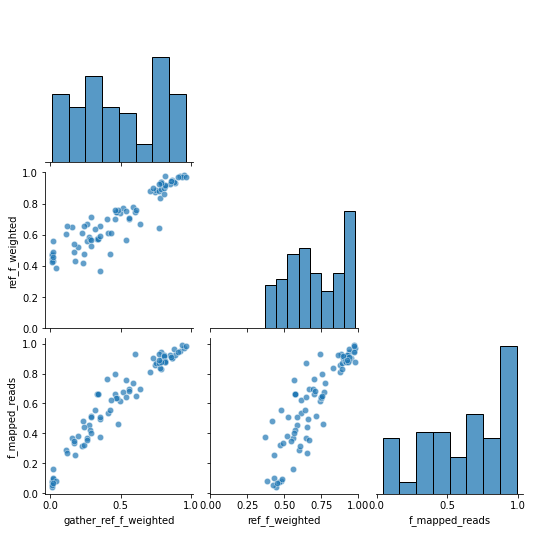

In [9]:
g = sns.pairplot(
    df,
    vars=["gather_ref_f_weighted", "ref_f_weighted", "f_mapped_reads"],
    corner=True,
    plot_kws={"alpha": 0.7, "s": 40}
)

# set axis limits for ref_f_weighted
for i, yvar in enumerate(g.y_vars):
    for j, xvar in enumerate(g.x_vars):
        ax = g.axes[i, j]
        if ax is None:
            continue
        if xvar == "ref_f_weighted":
            ax.set_xlim(0, 1.0)
        if yvar == "ref_f_weighted":
            ax.set_ylim(0, 1.0)

plt.show()